### Import libraries and load datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_aisles = pd.read_csv('./db/aisles.csv')
print(df_aisles.shape)
df_aisles.head()
# it seemeed to be the search keywords used by the users to serach for the products they ordered

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
df_dpts = pd.read_csv('./db/departments.csv')
print(df_dpts.shape)
df_dpts.head()
# it is the broader categories of grocery products available

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
df_orders_prior = pd.read_csv('./db/order_products__prior.csv')
print(df_orders_prior.shape)
df_orders_prior.head()
#  here in that particular order(order id), that product(product id) is added in which order and whether it has been reordered previously or not

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
df_orders_training = pd.read_csv('./db/order_products__train.csv')
print(df_orders_training.shape)
df_orders_training.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
df_orders = pd.read_csv('./db/orders.csv')
print(df_orders.shape)
df_orders.head(10)
# order_dow - day of week

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [8]:
df_products = pd.read_csv('./db/products.csv')
print(df_products.shape)
df_products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Check for missing values:

In [9]:
# checking for nan values
df_aisles.isna().sum(), df_dpts.isna().sum(), df_orders.isna().sum(), df_orders_prior.isna().sum(), df_orders_training.isna().sum(), df_products.isna().sum()

(aisle_id    0
 aisle       0
 dtype: int64,
 department_id    0
 department       0
 dtype: int64,
 order_id                       0
 user_id                        0
 eval_set                       0
 order_number                   0
 order_dow                      0
 order_hour_of_day              0
 days_since_prior_order    206209
 dtype: int64,
 order_id             0
 product_id           0
 add_to_cart_order    0
 reordered            0
 dtype: int64,
 order_id             0
 product_id           0
 add_to_cart_order    0
 reordered            0
 dtype: int64,
 product_id       0
 product_name     0
 aisle_id         0
 department_id    0
 dtype: int64)

In [10]:
df_orders.isna().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [11]:
df_orders.days_since_prior_order.value_counts()
# So, Nan must be the values when days since prior order are 30+
# also for first order of that user has also NaN in days_since_prior_order (seen from df_orders.head())
# also, order number is the nth order by that specific user

days_since_prior_order
30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: count, dtype: int64

# Products Analysis
Output:
1.   df_products_description


In [12]:
# Perform a left merge between products and aisles dataframes based on aisle_id
df_productwithaisle = pd.merge(df_products, df_aisles, how='left', on='aisle_id')

# Perform a left merge between the previous result and departments dataframe based on department_id
# Note: Ensure department_id is present and correctly matched in df_productwithaisle for this to work as expected
df_products_description = pd.merge(df_productwithaisle, df_dpts, how='left', on='department_id')

# Display the first few rows of the final merged dataframe
df_products_description.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [13]:
df_products_description.to_csv('./db/df_products_description.csv')

In [14]:
# see how many products are in each aisle
plt.figure(figsize = (14,7))
sns.barplot(data = df_products_description, x = df_products_description['aisle'].value_counts().index, y = df_products_description['aisle'].value_counts().values)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count(No of products)')
plt.xlabel('Aisle')

ValueError: Length of Index vectors must match length of `data` when both are used, but `data` has length 49688 and the vector passed to `x` has length 134.

<Figure size 1400x700 with 0 Axes>

Text(0.5, 0, 'Aisle')

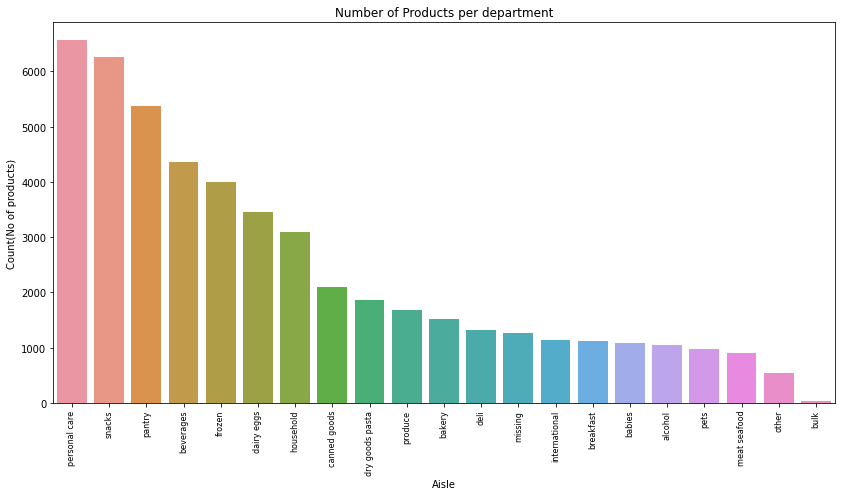

In [ ]:
# see no. of products in each departments
plt.figure(figsize = (14,7))
sns.barplot(data = df_products_description, x = df_products_description['department'].value_counts().index, y = df_products_description['department'].value_counts().values)
plt.title('Number of Products per department')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count(No of products)')
plt.xlabel('Aisle')

In [15]:
df_products_description[df_products_description['aisle']=='missing']
# so, with aisle id 100 and dept_id 21 aisle and depts are missing (1258 rows)
# Also, from df_products_description, it is evident that,
# ---> an aisle belongs to only one department
# ---> however a department can have more than one aisle

,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


### Exploratory Data Analysis:

In [16]:
print(df_orders['eval_set'].value_counts())
# prior is history data
def get_unique_cnt(x):
    return len(np.unique(x))
count_acc = df_orders.groupby("eval_set")['user_id'].agg(get_unique_cnt)
print(count_acc)
# So, total 206209 customers out which 131209 are kept for trainig and 75000 are for testing

eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64
eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64


In [17]:
df_products = pd.read_csv('./db/products.csv')
print(df_products.shape)
df_products.head()
# product belongs to which product id, aisle id and which category of foods(departments)

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [18]:
plt.figure(figsize= (12,8))
sns.barplot(df_orders['user_id'].value_counts().value_counts().index, df_orders['user_id'].value_counts().value_counts().values)
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Maximum Order Number", fontsize=12)
plt.xticks(rotation=90)

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1200x800 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'freq')

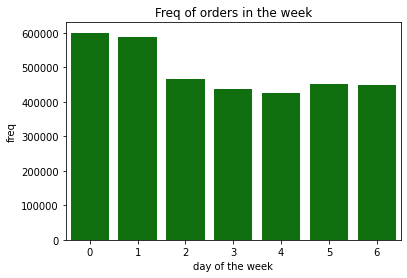

In [ ]:
sns.barplot(df_orders['order_dow'].value_counts().index, df_orders['order_dow'].value_counts().values, color='g')
plt.title('Freq of orders in the week')
plt.xlabel('day of the week')
plt.ylabel('freq')

Text(0.5, 1.0, 'Freq of day since prior order')

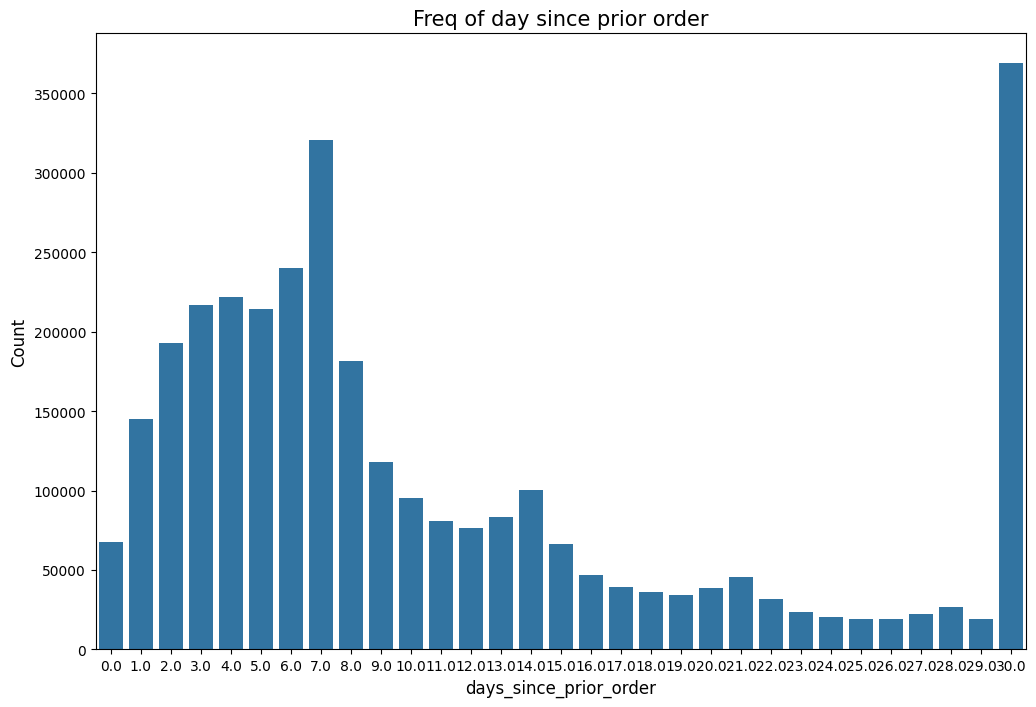

In [22]:
plt.figure(figsize = (12,8))
data = df_orders['days_since_prior_order'].value_counts().reset_index()
data.columns = ['days_since_prior_order', 'count']
sns.barplot(x='days_since_prior_order', y='count', data=data)
# sns.barplot(df_orders['days_since_prior_order'].value_counts().index, df_orders['days_since_prior_order'].value_counts().values)
plt.ylabel("Count", fontsize=12)
plt.xlabel("days_since_prior_order", fontsize=12)
plt.title("Freq of day since prior order", fontsize=15)

<Axes: xlabel='order_hour_of_day', ylabel='count'>

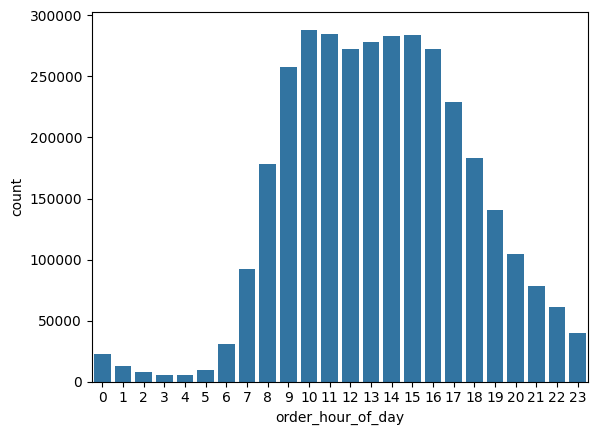

In [20]:
sns.countplot(data = df_orders, x ='order_hour_of_day')

In [23]:
# Percentage of reorder in Prior and training dataset
df_orders_prior.reordered.sum()/df_orders_prior.shape[0], df_orders_training.reordered.sum()/df_orders_training.shape[0]


(np.float64(0.5896974667922161), np.float64(0.5985944127509629))

In [24]:
#  so, around 59% of the products are reordered,
# now let's check the situations when none of the products in the order have been reordered
df_grouped = df_orders_prior.groupby('order_id')['reordered'].agg('sum').reset_index()
df_with0reorder = df_grouped[df_grouped['reordered']==0]
df_with0reorder.shape[0]/df_grouped.shape[0]

0.12084859313304347

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
 

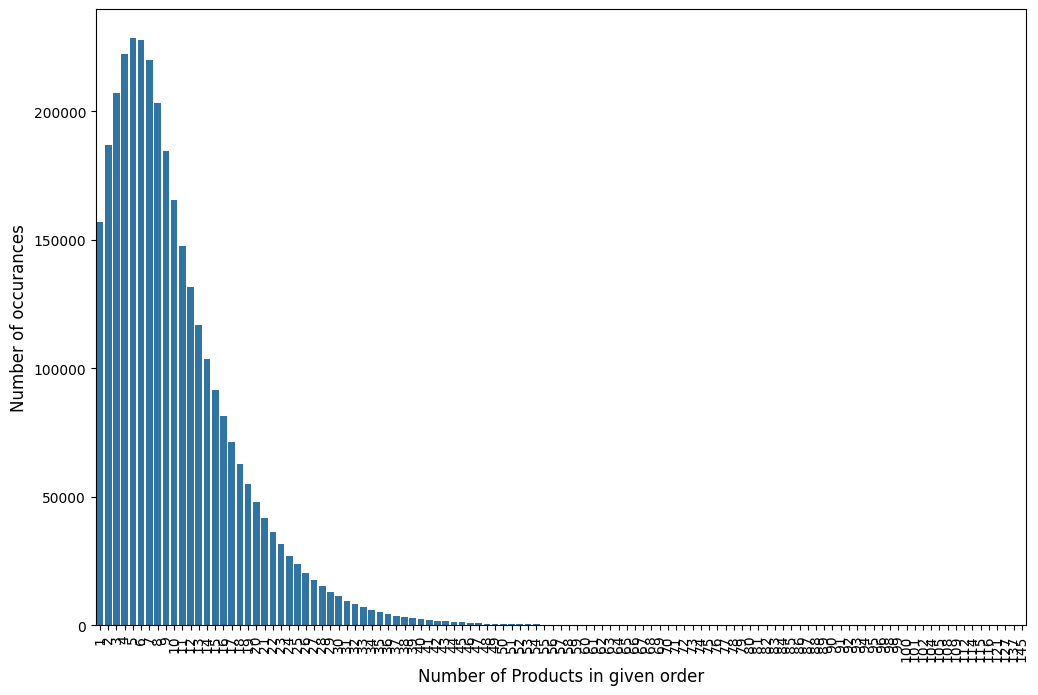

In [25]:
# Now, the number of products ordered in each order
def get_unique_count(x):
  return len(np.unique(x))
df_no_of_prod_in_orders = df_orders_prior.groupby('order_id')['add_to_cart_order'].agg(get_unique_count).reset_index()
plt.figure(figsize=(12,8))
sns.countplot(data = df_no_of_prod_in_orders, x = 'add_to_cart_order' )
plt.ylabel("Number of occurances", fontsize=12)
plt.xlabel("Number of Products in given order", fontsize=12)
plt.xticks(rotation="vertical")

### Merge all dataframes in one

In [26]:
df_orders_prior.shape

(32434489, 4)

In [27]:
df_dpts.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [28]:
# merging the order_prior, products, aisle, and department dataframes in one
df_merged = pd.merge(df_orders_prior, df_products, how='left', on = 'product_id')
df_merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13
...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1
32434487,3421083,24852,9,1,Banana,24,4


In [29]:
df_merged = pd.merge(df_merged, df_aisles, how='left', on = 'aisle_id')
df_merged = pd.merge(df_merged, df_dpts, how='left', on = 'department_id')
df_merged

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,Banana,24,4,fresh fruits,produce


([<matplotlib.patches.Wedge at 0x2101a12e330>,
 [Text(0.6680107493775921, 0.8739345734756053, 'produce'),
  Text(-0.7813301787613322, 0.7742888038431042, 'dairy eggs'),
  Text(-1.0997035947398508, -0.02553436343929714, 'snacks'),
  Text(-0.9299493137126462, -0.5875323598963537, 'beverages'),
  Text(-0.5562239830901624, -0.949007313267561, 'frozen'),
  Text(-0.144622671272448, -1.0904514124682592, 'pantry'),
  Text(0.17936890751538212, -1.0852772894595826, 'bakery'),
  Text(0.40926760399049184, -1.0210289067033715, 'canned goods'),
  Text(0.6087983581178859, -0.9161684120034737, 'deli'),
  Text(0.7675388285874842, -0.7879620210457816, 'dry goods pasta'),
  Text(0.8803048637411006, -0.659593319306497, 'household'),
  Text(0.9638797132281292, -0.5300338653588652, 'breakfast'),
  Text(1.0273914994105917, -0.3930225272663847, 'meat seafood'),
  Text(1.0648741453059216, -0.27575905181694926, 'personal care'),
  Text(1.0843222777541164, -0.18505458104603992, 'babies'),
  Text(1.09429326915463

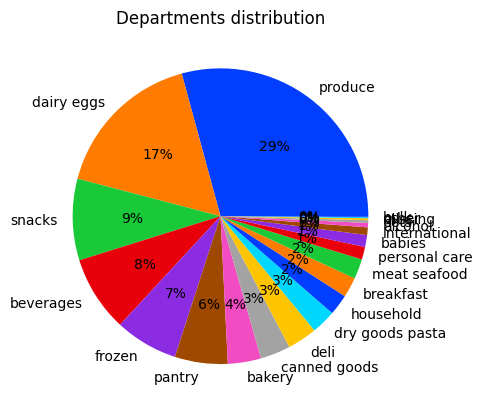

In [34]:
plt.title('Departments distribution')
x1 = df_merged['department'].value_counts().index
y1 =df_merged['department'].value_counts().values
colors = sns.color_palette('bright')
plt.pie(y1, labels=x1,colors = colors, autopct = '%0.0f%%')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

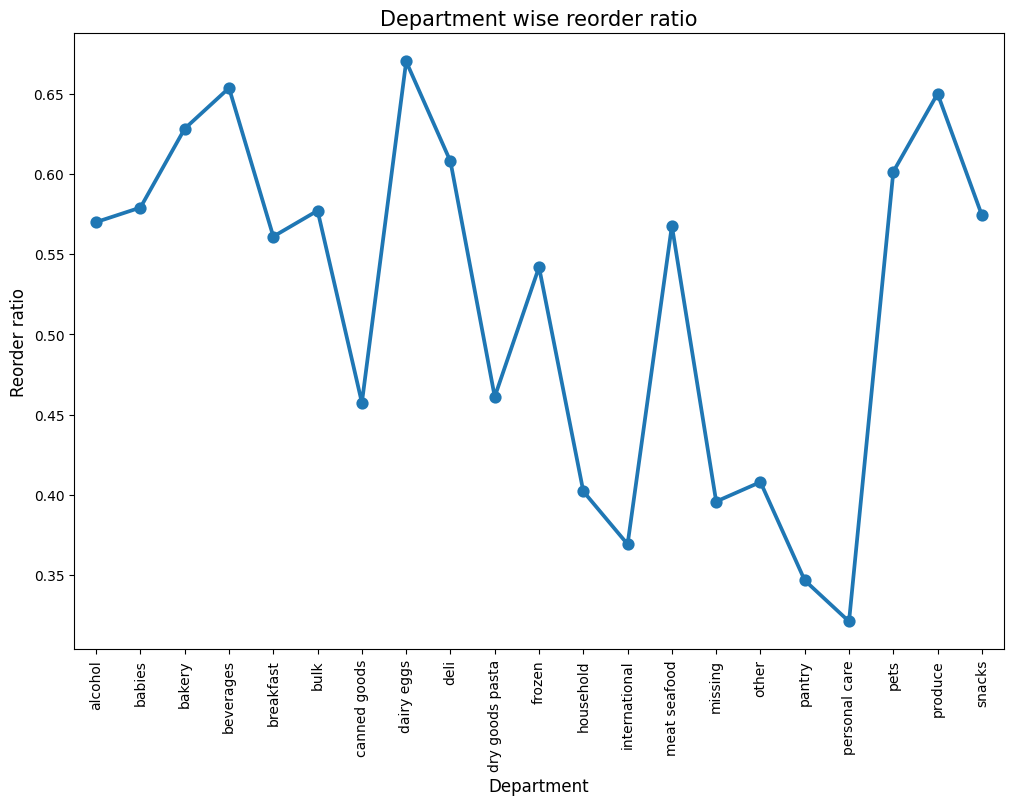

In [38]:
# Department wise Reorder ratio
df_merged_grouped = df_merged.groupby('department')['reordered'].agg('mean').reset_index()
# df_merged_grouped
plt.figure(figsize=(12,8))
sns.pointplot(x=df_merged_grouped['department'], y=df_merged_grouped['reordered'])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
# Personal care has lowest reorder ratio and dairy eggs have highest reorder ratio.

# DATA PRE-PROCESSING
Merge order products together
output:
1.   dfmerged_order_products
2.   df_orders_with_products_desc

In [39]:
print(len(df_orders_training))
print(len(df_orders_prior))

# The dataframe of all order products should be the length of these two together
len(df_orders_training)+len(df_orders_prior)

1384617
32434489


33819106

In [ ]:
# These two dataframes shouldn't have any overlap.  I need an outer join to merge them together.
dfmerged_order_products = pd.merge(df_orders_training, df_orders_prior, how = 'outer')
print(dfmerged_order_products.shape)
dfmerged_order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
# Add aisle id and department id also
df_orders_with_products_desc = pd.merge(dfmerged_order_products, df_products_description, on = 'product_id')
df_orders_with_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


# Merge User Orders
Output:
1. dfmerged_orders_with_products

In [ ]:
import pandas as pd
from typing import List


def optimize_floats(df: pd.DataFrame) -> pd.DataFrame:
    floats = df.select_dtypes(include=['float64']).columns.tolist()
    df[floats] = df[floats].apply(pd.to_numeric, downcast='float')
    return df


def optimize_ints(df: pd.DataFrame) -> pd.DataFrame:
    ints = df.select_dtypes(include=['int64']).columns.tolist()
    df[ints] = df[ints].apply(pd.to_numeric, downcast='integer')
    return df


def optimize_objects(df: pd.DataFrame, datetime_features: List[str]) -> pd.DataFrame:
    for col in df.select_dtypes(include=['object']):
        if col not in datetime_features:
            if not (type(df[col][0])==list):
                num_unique_values = len(df[col].unique())
                num_total_values = len(df[col])
                if float(num_unique_values) / num_total_values < 0.5:
                    df[col] = df[col].astype('category')
        else:
            df[col] = pd.to_datetime(df[col])
    return df



def optimize(df: pd.DataFrame, datetime_features: List[str] = []):
    return optimize_floats(optimize_ints(optimize_objects(df, datetime_features)))


In [ ]:
df_orders_with_products_desc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          int64 
 4   product_name       object
 5   aisle_id           int64 
 6   department_id      int64 
 7   aisle              object
 8   department         object
dtypes: int64(6), object(3)
memory usage: 2.5+ GB


In [ ]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [ ]:
df_orders = optimize(df_orders)
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float32 
dtypes: category(1), float32(1), int32(2), int8(3)
memory usage: 52.2 MB


In [ ]:
df_orders_with_products_desc = optimize(df_orders_with_products_desc)
df_orders_with_products_desc.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 9 columns):
 #   Column             Dtype   
---  ------             -----   
 0   order_id           int32   
 1   product_id         int32   
 2   add_to_cart_order  int16   
 3   reordered          int8    
 4   product_name       category
 5   aisle_id           int16   
 6   department_id      int8    
 7   aisle              category
 8   department         category
dtypes: category(3), int16(2), int32(2), int8(2)
memory usage: 936.7 MB


In [ ]:
del df_aisles, df_dpts, df_orders_prior, df_orders_training, df_products

In [ ]:
# Now merge the orders with the ordered prodcuts, combining on order_id
# This is a lot of info. We will trim some out before modeling.
dfmerged_orders_with_products = pd.merge(df_orders, df_orders_with_products_desc, on = 'order_id')
dfmerged_orders_with_products.head() # Because the products showing are from the 1st order for this user, they all have Nan in days_since
# Because pd.merge defaults to an inner join, the test orders are not in this dataframe because they had no products.
# del df_orders, df_orders_with_products_desc

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks


In [ ]:
dfmerged_orders_with_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float32 
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  product_name            category
 11  aisle_id                int16   
 12  department_id           int8    
 13  aisle                   category
 14  department              category
dtypes: category(4), float32(1), int16(2), int32(3), int8(5)
memory usage: 1.3 GB


In [ ]:
dfmerged_orders_with_products.to_csv('./db/dftryoptimised.csv')

In [ ]:
dfmerged_orders_with_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float32 
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  product_name            category
 11  aisle_id                int16   
 12  department_id           int8    
 13  aisle                   category
 14  department              category
dtypes: category(4), float32(1), int16(2), int32(3), int8(5)
memory usage: 1.3 GB


In [ ]:
dfmerged_orders_with_products = optimize(dfmerged_orders_with_products)
dfmerged_orders_with_products.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   eval_set                category
 3   order_number            int8    
 4   order_dow               int8    
 5   order_hour_of_day       int8    
 6   days_since_prior_order  float32 
 7   product_id              int32   
 8   add_to_cart_order       int16   
 9   reordered               int8    
 10  product_name            category
 11  aisle_id                int16   
 12  department_id           int8    
 13  aisle                   category
 14  department              category
dtypes: category(4), float32(1), int16(2), int32(3), int8(5)
memory usage: 1.3 GB


In [ ]:
dfmerged_orders_with_products.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks


In [ ]:
# del df_aisles, df_dpts, df_orders_prior, df_orders_training, df_products, df_orders, df_orders_with_products_desc

In [1]:
#### dictionary to match for github and my dataframes
# mine  -->   github ones            
# df_aisles  -->   aisles
# df_dpts  -->   departments
# df_orders_prior  -->   order_products_prior
# df_orders_training  -->   order_products_train
# df_orders  -->   orders
# df_products  -->   products
# df_products_description  -->   order_products_desc
# dfmerged_order_products  -->   merged_order_products
# df_orders_with_products_desc  -->   merged_orders